In [4]:
import pandas as pd

# Load dataset
file_path = 'path_to_your_file.csv'  # Replace with your actual file path
data = pd.read_csv("/content/abc.csv")

# Initial inspection
print(data.head())
print(data.info())
print(data.describe())


   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB
None
       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      

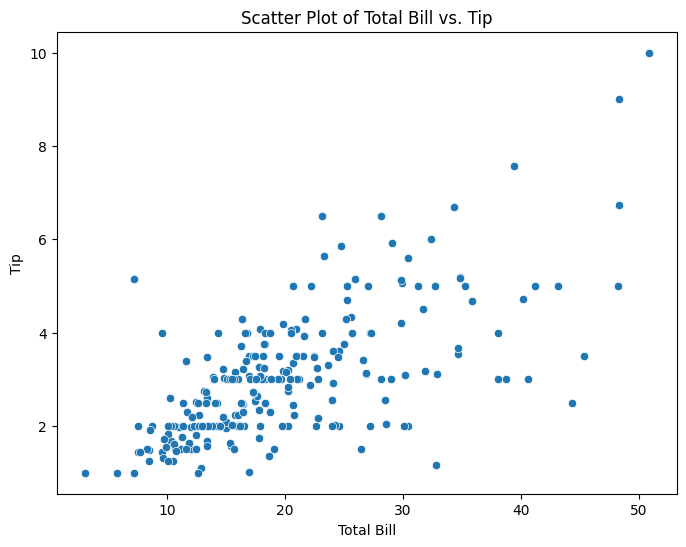

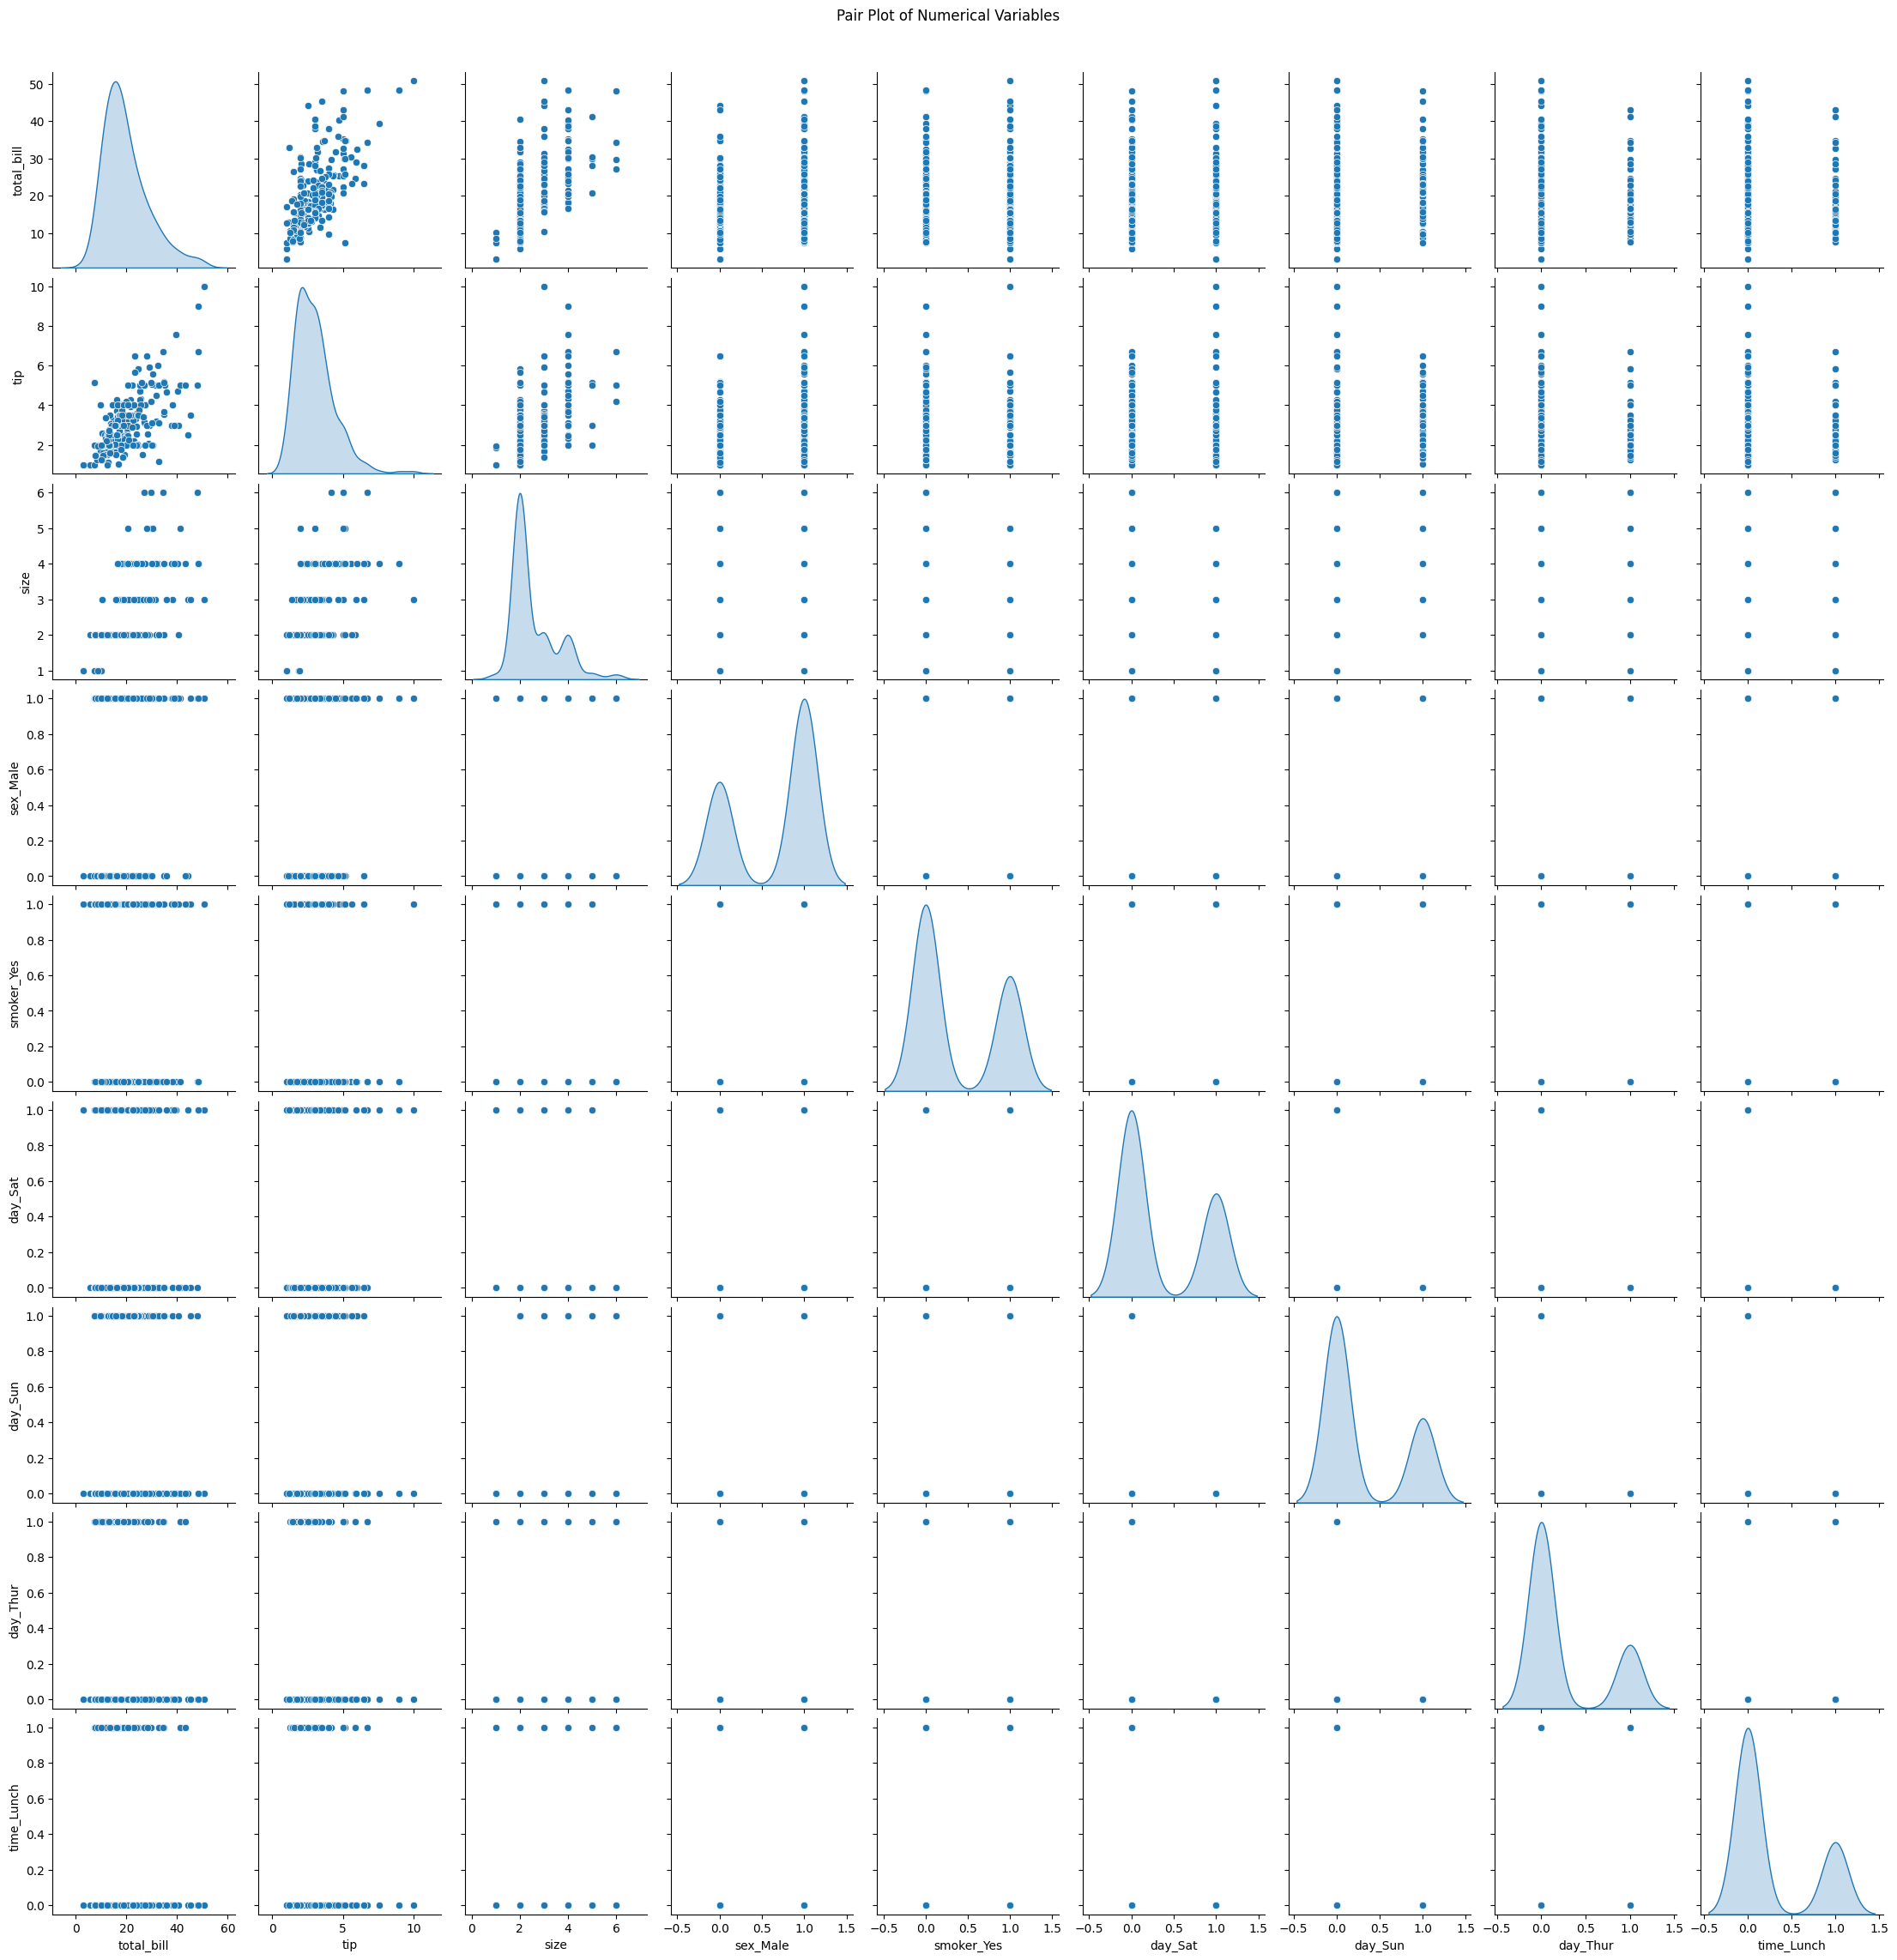

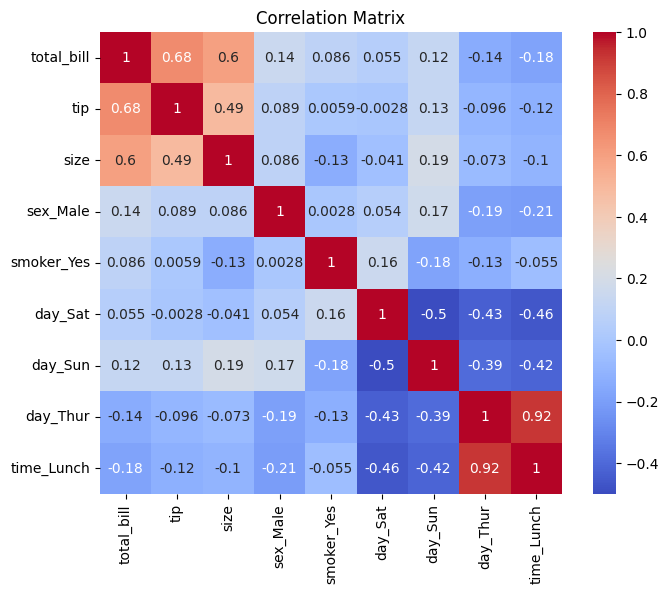

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert categorical columns to numeric for plotting
data_encoded = pd.get_dummies(data, drop_first=True)

# Drop rows with any missing values
data_cleaned = data_encoded.dropna()

# Scatter plot for total_bill vs. tip
plt.figure(figsize=(8, 6))
sns.scatterplot(x='total_bill', y='tip', data=data_cleaned)
plt.title('Scatter Plot of Total Bill vs. Tip')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.show()

# Pair plot to visualize relationships between numerical variables
sns.pairplot(data_cleaned, diag_kind='kde')
plt.suptitle("Pair Plot of Numerical Variables", y=1.02)
plt.show()

# Correlation matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(data_cleaned.corr(), annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()


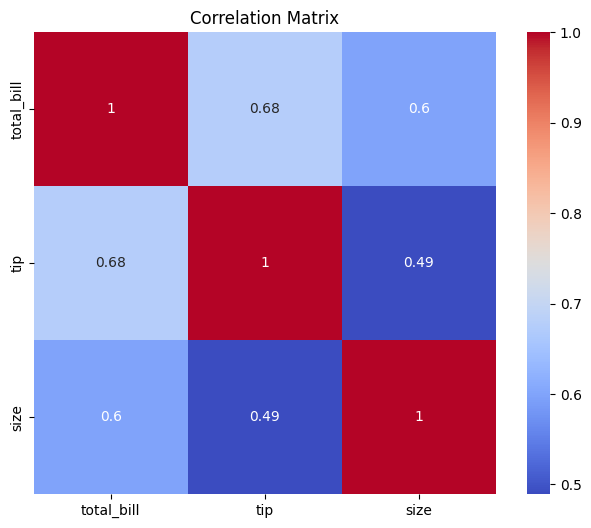

Rainbow Test Statistic: 1.2291480226129028, p-value: 0.1291192152551375


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.diagnostic import linear_rainbow

# Ensure numeric-only columns for correlation matrix
numeric_data = data.select_dtypes(include=[float, int]).dropna()

# Correlation matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

# Statistical Test for Linearity: Rainbow Test
# Define target (tip) and predictor (total_bill)
X = sm.add_constant(numeric_data['total_bill'])  # Adding a constant for the intercept
y = numeric_data['tip']

# Fit an OLS model
model = sm.OLS(y, X).fit()

# Perform Rainbow test
rainbow_stat, rainbow_p_value = linear_rainbow(model)
print(f'Rainbow Test Statistic: {rainbow_stat}, p-value: {rainbow_p_value}')



In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [11]:
# Encoding categorical variables
data = pd.get_dummies(data, drop_first=True)

# Define features and target variable
X = data.drop('tip', axis=1)
y = data['tip']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=0.1),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'SVR': SVR(kernel='linear'),
    'KNN': KNeighborsRegressor(n_neighbors=5)
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MSE': mse, 'R2': r2}
    print(f"{name} - MSE: {mse}, R2: {r2}")


Linear Regression - MSE: 0.7033566017436106, R2: 0.43730181943482493
Ridge - MSE: 0.7007477213216077, R2: 0.4393889716178484
Lasso - MSE: 0.5908528649971524, R2: 0.5273068720881755
Decision Tree - MSE: 0.9694020408163265, R2: 0.22446058905073774
Random Forest - MSE: 0.8679109736734706, R2: 0.30565530405494923
SVR - MSE: 0.6524534436627769, R2: 0.47802527943520123
KNN - MSE: 0.8763725714285714, R2: 0.29888587066985495


In [13]:
# Feature importance for Random Forest (if selected as the best model)
best_model = RandomForestRegressor()
best_model.fit(X_train, y_train)
feature_importances = best_model.feature_importances_

# Display feature importances
importances = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importances = importances.sort_values(by='Importance', ascending=False)
print(importances)


      Feature  Importance
0  total_bill    0.773158
3  smoker_Yes    0.064476
1        size    0.063696
4     day_Sat    0.028057
5     day_Sun    0.026134
2    sex_Male    0.021117
7  time_Lunch    0.013001
6    day_Thur    0.010360


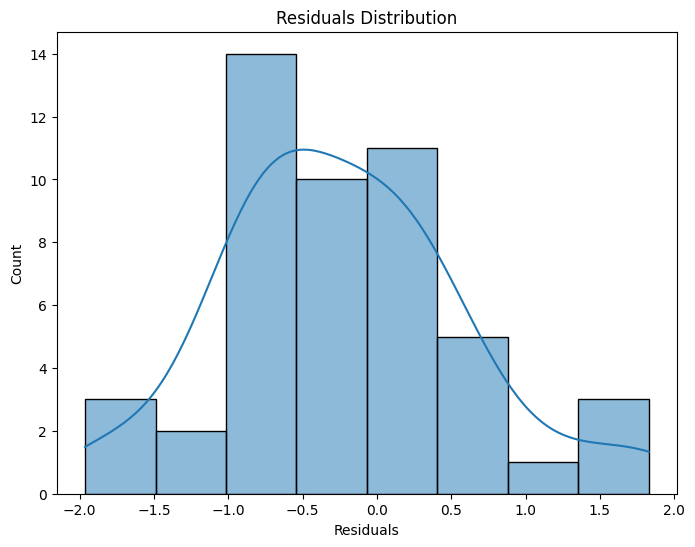

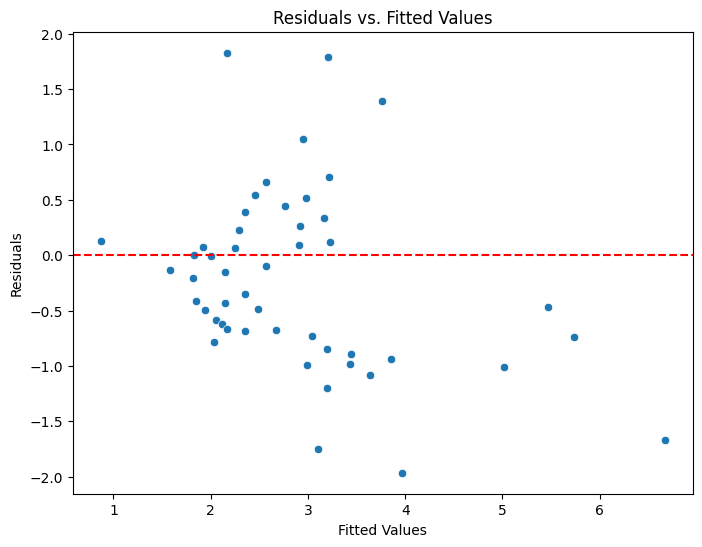

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Residuals plot for Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.show()

# Residuals vs. Fitted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs. Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()


In [15]:
from sklearn.model_selection import GridSearchCV

# Example: Tuning Random Forest Regressor
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialize Grid Search
rf_model = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best R2 Score:", grid_search.best_score_)

# Use the best model for predictions
best_rf_model = grid_search.best_estimator_
y_pred_best = best_rf_model.predict(X_test)
print("Test Set R2 Score:", r2_score(y_test, y_pred_best))


Best Parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}
Best R2 Score: 0.37252106262393775
Test Set R2 Score: 0.22219648192549213


In [16]:
from sklearn.preprocessing import PolynomialFeatures

# Generate interaction terms (degree=2 for pairwise interactions)
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X)

# Update train-test split with interaction terms
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)


In [17]:
from sklearn.preprocessing import StandardScaler

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply scaled data to models like SVR and KNN
svr_model = SVR(kernel='linear')
svr_model.fit(X_train_scaled, y_train)
y_pred_svr = svr_model.predict(X_test_scaled)
print("SVR Model - R2 Score:", r2_score(y_test, y_pred_svr))

knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
y_pred_knn = knn_model.predict(X_test_scaled)
print("KNN Model - R2 Score:", r2_score(y_test, y_pred_knn))


SVR Model - R2 Score: 0.4790928970164343
KNN Model - R2 Score: 0.27763418350081626
